#Introduction to pydoocs

In [1]:
# Making the packages numpy and matplatlib available in the 
# workspace of this ipython notebook. In a real python script,
# these packages have to be imported.            

In [2]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [3]:
#import sys
#sys.path.insert(0, "/home/cbehrens/doocs/Darwin-x86_64/obj/library/python/pydoocs/")  # just to have the lates build
# Importing the DOOCS python bindings
import pydoocs  

In [4]:
pydoocs.__file__

'/home/cbehrens/doocs/Darwin-x86_64/obj/library/python/pydoocs/pydoocs.so'

In [5]:
# Showing the available functions
help(pydoocs)

Help on module pydoocs:

NAME
    pydoocs - Python3 bindings to the standard DOOCS client API written in C/C++.

FUNCTIONS
    names(...)
        Query names from the given name domain.
    
    read(...)
        Read data from the given channel address.
    
    write(...)
        Write data to the given channel address.

FILE
    /home/cbehrens/doocs/Darwin-x86_64/obj/library/python/pydoocs/pydoocs.so




##The read function

In [6]:
# The read function takes 1 parameter, which is DOOCS channel/address to read out. 
bpm = pydoocs.read('XFEL.DIAG/BPM/BPMG.24.I1/X.SA1')  # Here we use a BPM at XFEL

In [7]:
print(type(bpm))  # the data type of the output is a python dict

<class 'dict'>


In [8]:
# with 5 keys: 'data': the returned data 
#              'macropulse': the macropulse number  
#              'type': the data type 
#              'timestamp': the timestamp with microsecond resolution
#              'channel': the read-out DOOCS address 
print(bpm1GUN.keys()) 

NameError: name 'bpm1GUN' is not defined

In [9]:
bpm  # the raw output looks like that, a dict with 5 key-value pairs

{'channel': 'XFEL.DIAG/BPM/BPMG.24.I1/X.SA1',
 'data': 0.0,
 'macropulse': 1203096842,
 'timestamp': 1477304505.270478,
 'type': 'FLOAT'}

In [10]:
bpm['data']  # Python syntax for dict to access the value via the key 

0.0

In [11]:
# When read-out a TD (array type), the data field is a tuple, with more than 1 element
print(type(pydoocs.read('FLASH.DIAG/BPM/1GUN/X.TD')['data'])) # here with a FLASH BPM
print(len(pydoocs.read('FLASH.DIAG/BPM/1GUN/X.TD')['data']))  # here we have 1024 elements.

<class 'tuple'>
1024


###Exceptions

In [12]:
# For wrong input or readout errors, exceptions are thrown as
# a dict with error message and error code 
pydoocs.read('FLASH.DIAG/BPM/1GUN/X.FLASH')

OSError: {'code': 1001, 'message': 'ill. property'}

In [13]:
# Whenever readout error are expected, 
# the try-except block is the way to go
try:
    pydoocs.read('FLASH.DIAG/BPM/1GUN/X.FLASH')
except:
    # do exception handling
    pass

In [14]:
# The exception type, the error message and code can 
# also be displayed and accessed.
try:
    pydoocs.read('FLASH.DIAG/BPM/1GUN/spam')
except Exception as err:
    print(type(err))
    print(err)
    print(err.args[0]['message'])
    print(err.args[0]['code'])

<class 'OSError'>
{'code': 1001, 'message': 'ill. property'}
ill. property
1001


In [15]:
# Another error message and code
try:
    pydoocs.read('FLASH.DIAG/BPM/eggs/X.FLASH1')
except Exception as err:
    print(err.args[0]['message'], "with code", err.args[0]['code'])  

illegal service with code 101


###The famous but sometimes vicious * (wildcard) operation

In [16]:
bpmAll = pydoocs.read('FLASH.DIAG/BPM/*/X.FLASH1')  # Here we read all BPM at FLASH via the * wildcard  

In [17]:
print(type(bpmAll['data'])) # This time, the data field is a tuple
print(type(bpmAll['data'][0]))  # and an element of this tuple is a dict
print(bpmAll['data'][0].keys())  # with 3 keys: the integer, float, and string part of the returned data 

<class 'tuple'>
<class 'dict'>
dict_keys(['int', 'float', 'str'])


In [18]:
len(bpmAll['data'])  # The tuple has 65 entries for the 65 read-out BPM values 

65

In [19]:
# Showing only the first 3 elements of the 65 entry-long tuple. 
# They show 3 dict, with the 'str' part showing the BPM and the float part
# showing the actual data. The int part is not used here (depending on the data type, which
# the *-operation is applied to, either the float or int part gets filled.)
bpmAll['data'][0:3]

({'float': 1.2318000793457031, 'int': 0, 'str': '1GUN'},
 {'float': 2.466799736022949, 'int': 0, 'str': '3GUN'},
 {'float': 3.413649559020996, 'int': 0, 'str': 'IDUMP'})

In [20]:
# Showing only the last 5 elements of the 65 entry-long tuple. 
bpmAll['data'][-5:]

({'float': 0.7186999320983887, 'int': 0, 'str': '9EXP'},
 {'float': 0.1885204315185547, 'int': 0, 'str': '9DUMP'},
 {'float': -4.6393280029296875, 'int': 0, 'str': '10DUMP'},
 {'float': 2.0995521545410156, 'int': 0, 'str': '13DUMP'},
 {'float': -10.54263687133789, 'int': 0, 'str': '16DUMP'})

In [21]:
bpmACC7 = pydoocs.read('FLASH.DIAG/BPM/*ACC7/X.FLASH1')  # Here we combine the * with characters to read all ACC7 BPMs

In [22]:
bpmACC7

{'channel': 'FLASH.DIAG/BPM/*ACC7/X.FLASH1',
 'data': ({'float': 0.5618114471435547, 'int': 0, 'str': '11ACC7'},
  {'float': -0.4763984680175781, 'int': 0, 'str': '15ACC7'},
  {'float': -1.8449440002441406, 'int': 0, 'str': '19ACC7'}),
 'macropulse': 59605270,
 'timestamp': 1477304511.214785,
 'type': 'A_USTR'}

In [23]:
# The *-op is supposed to deliver synchronized data between each monitor.
# It can be demonstrated by showing correlation in between, e.g., for the BCMs.
import time

samples = 100  
repRate = 10  # in Hz

# getting the data samples
dataList = []
for _ in range(samples):
    dataList.append(pydoocs.read('FLASH.DIAG/BCM/*/CH00.FLASH1')['data'])
    time.sleep(1/repRate)  # wait (1/10)s 

# preparing a dict with the key being the monitor and the value being a list of data points    
dataDict = {}    
for monitor in dataList[0]:    
    dataDict.update({monitor['str'] : []})

# filling the dict    
for sample in dataList:
    for monitor in sample:
        dataDict[monitor['str']].append(monitor['float'])

In [24]:
print(dataDict.keys())  # now we have a dict with 6 keys: the 6 BCM
print(type(dataDict['4DBC3.1']))  # each value is a list
print(len(dataDict['4DBC3.1']))  # with 100 samples

dict_keys(['4DBC3.1', '7ECOL', '9DBC2.2', '1FL2SEED4.2', '9DBC2.1', '4DBC3.2'])
<class 'list'>
100


In [25]:
# we can simply plot one monitor vs another and see a correlation, i.e., the data is in-sync
plot(dataDict['4DBC3.1'], dataDict['4DBC3.2'], 'o');

##The names function

In [26]:
# Use the wildcard * with names to get the available Facilities (1. part of the DOOCS address).
# the names function excpects 1 paramter, the address which usually contains the wildcard *
facilities = pydoocs.names('*')
print(len(facilities))  # there are 142 facilities found
facilities[:10]  # show only the first 10

142


('TTF2.VAC',
 'TTF2.RF',
 'TTF2.DIAG',
 'TTF2.DAQ',
 'TTF2.MAGNETS',
 'TTF2.UTIL',
 'TTF2.KRYO',
 'TTF2.EXP',
 'TTF2.FEL',
 'TTF2.SYSTEM')

In [27]:
# Use the wildcard * with names to get the available Devices of a facility (2. part of the DOOCS address).
devices = pydoocs.names('FLASH.DIAG/*')
print(len(devices))  # there are 78 facilities found for the FLASH.DIAG
devices[-10:]  # show only the last 10

78


('FFWD.ADC',
 'FLAFFWDPI11GPIO',
 'FFWD.SPECTRUM',
 'FFWDCONSTANTS',
 'FFWD.PICO.1',
 'FFWD.PICO.2',
 'FLAFFWDPI16GPIO',
 'FF.IOTAONE.GASJET',
 'FFWD.OCEAN.DAQ',
 'FFWD.LASERLAB.HEXAPOD')

In [28]:
# Check if the 'BCM' is listed in the tuple devices
'BCM' in devices

True

In [29]:
# The previous check yielded True, so the positionin the tuple can be extracted
devices.index('BCM')

16

In [30]:
# Use the wildcard * with names to get the available Locations (3. part of the DOOCS address).
# Here, we make use of the former lines. This is not particularly useful here, but it shows the principle.
if 'BCM' in devices:
    locations = pydoocs.names('FLASH.DIAG/' + devices[devices.index('BCM')] + "/*")

locations # show all found locations   

('FLASHCPUDIAG1._SVR',
 '9DBC2.1',
 '9DBC2.2',
 'FLASHCPUDIAG1.SND',
 'FLASHCPUDIAG4._SVR',
 '4DBC3.1',
 '4DBC3.2',
 '7ECOL',
 'FLASHCPUDIAG4.SND',
 'FLASH2CPUDIAG4._SVR',
 '1FL2SEED4.1',
 '1FL2SEED4.2',
 'FLASH2CPUDIAG4.SND')

In [31]:
# Show the the samle locations as before but only those starting with 4DBC
pydoocs.names('FLASH.DIAG/BCM/4DBC*')

('4DBC3.1', '4DBC3.2')

In [32]:
# show the first 10 Properties (Property is the last 4. part of the DOOCS address)
# the first string in capital letters before the first whitespace is the actual property,
# the second string is just documentation
pydoocs.names('FLASH.DIAG/BCM/4DBC3.1/*')[:10]  

('NAME = location',
 'STS gen.Status word',
 'STS.ERROR pending error status',
 'STS.NEWERROR new error detected',
 'STS.ERRORMASK disable new_error',
 'STS.ONLINE device on-line status',
 'SET.ONLINE command to set on-line',
 'ERROR general error code',
 'ERROR.STR error as string',
 'SYS_MASK bit mask: systems the device belongs to')

##The write function

In [33]:
# first, we read the data of a given address
pydoocs.read("TEST.DOOCS/TEST.D_FCT/LOCATION/D_INT")['data']  # it returns 0

0

In [34]:
# now we use the wriote function to write the int 23 to the given address
# the write function expects 2 parameter, the address and the input data
pydoocs.write("TEST.DOOCS/TEST.D_FCT/LOCATION/D_INT", 23)

In [35]:
# now we read again
print(pydoocs.read("TEST.DOOCS/TEST.D_FCT/LOCATION/D_INT")['data'])  # it returns 23
pydoocs.write("TEST.DOOCS/TEST.D_FCT/LOCATION/D_INT", 0)

0


##Images

In [36]:
img = pydoocs.read("FLASH.DIAG/CAMERA/1FL2SEED4/IMAGE_EXT")
# with numpy support, the readout is much faster and the data types also provide built-in method (see below)
imgNumpy = pydoocs.read("FLASH.DIAG/CAMERA/1FL2SEED4/IMAGE_EXT", numpy=True)

In [37]:
img.keys()  # the same dict as for every other data type

dict_keys(['data', 'timestamp', 'macropulse', 'channel', 'type'])

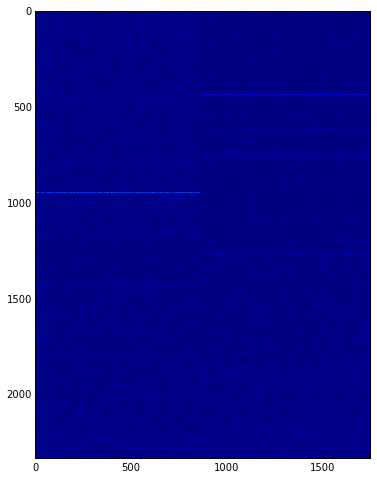

In [38]:
figure(figsize = (8,8))
imshow(img['data']);  # plot the image, which currently has no beam 

In [39]:
type(img['data'])  # the standard type is a tuple of tuples 

tuple

In [40]:
type(imgNumpy['data']) # with numpy support the data has a numpy data type with all its methods (see below)

numpy.ndarray

In [41]:
print([m for m in imgNumpy['data'].__dir__() if m[0] is not '_'])  # the method of numpy data types

['prod', 'ctypes', 'sum', 'T', 'conj', 'dumps', 'choose', 'diagonal', 'tofile', 'max', 'itemset', 'any', 'sort', 'ptp', 'view', 'argsort', 'nbytes', 'item', 'setflags', 'shape', 'cumsum', 'std', 'real', 'dump', 'getfield', 'take', 'transpose', 'newbyteorder', 'flatten', 'copy', 'dot', 'put', 'conjugate', 'astype', 'clip', 'var', 'mean', 'size', 'ndim', 'compress', 'argmax', 'squeeze', 'reshape', 'imag', 'argpartition', 'all', 'resize', 'ravel', 'dtype', 'byteswap', 'cumprod', 'min', 'itemsize', 'flat', 'base', 'searchsorted', 'setfield', 'tolist', 'data', 'strides', 'argmin', 'swapaxes', 'tobytes', 'nonzero', 'tostring', 'partition', 'fill', 'round', 'repeat', 'flags', 'trace']
